## Monty Hall

We are in a quiz show! 

There are three doors, one with a car behind and the other two with goats, if you can find the car you win.

Partecipants are asked to pick a closed door and the host then opens a different door revealing a goat. Simulate the case in which the partecipant doesn't change the chosen door after the reveal, the case in which they always switch, and a third case in which the partecipant arrives after that one door with a goat has been opened.

### 3 doors

In [142]:
import numpy as np

doors = ['car', 'goat', 'goat'] #the three doors

#winning counts
win_A = 0
win_B = 0
win_C = 0

#number of matches
N_tries = 100000

In [143]:
#The conservative case

for j in range(N_tries):
    
    np.random.shuffle(doors)       #shuffling the doors
    
    A = np.random.choice([0,1,2])  #extracting one door for player A
    
    #opening a door for partecipant A that contains a goat and that is different from the one chosen by A
    #in the case of A this passage is quite useless since they won't change their mind after.
    for i in range(3):
        if doors[i]=='goat' and i!=A:
            open_A = i
            break
            
    #if A finds the car A wins!
    if doors[A] == 'car':
        win_A = win_A +1

#winning probability for A
prob_A = win_A/N_tries

In [144]:
#Switcher case

for j in range(N_tries):
    
    np.random.shuffle(doors)      #shuffling the doors
    
    B = np.random.choice([0,1,2]) #extracting one door for player B
    
    #opening a door different from the one chosen by B that contains a goat
    for i in range(3):  
        if doors[i]=='goat' and i!=B: 
            open_B = i
            break
    
    #B changes idea and picks B_new different from the previous choice and the open door
    for i in range(3):
        if i!=open_B and i!=B:
            B_new = i
    
    #if B finds the car B wins!
    if doors[B_new]=='car':
        win_B = win_B +1
        
#winning probability for B
prob_B = win_B/N_tries

In [145]:
#The late one

for j in range(N_tries):
    doors_C = ['car', 'goat']   #C has only two doors to choose from
    
    np.random.shuffle(doors_C)  #"everyday I'm shuffling"
    
    C = np.random.choice([0,1]) #C picks one of the two doors
    
    #if C gets the car C wins!
    if doors_C[C] == 'car':
        win_C = win_C +1

#winning probability for C
prob_C = win_C/N_tries   

Text(1.88, 0.51839, '0.50')

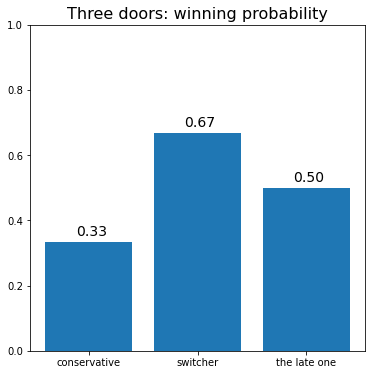

In [148]:
#Visualizing data

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

partecipants = ('conservative', 'switcher', 'the late one')
winning_prob = [prob_A, prob_B, prob_C]

x_pos = np.arange(len(partecipants))
ax.bar(x_pos,winning_prob)
ax.set_xticks(x_pos)
ax.set_xticklabels(partecipants)
ax.set_title("Three doors: winning probability", fontsize=16)
ax.set_ylim(0,1)

ax.text( -0.12, prob_A+0.02, "%.2f" %prob_A, fontsize=14)
ax.text(1-0.12, prob_B+0.02, "%.2f" %prob_B, fontsize=14)
ax.text(2-0.12, prob_C+0.02, "%.2f" %prob_C, fontsize=14)

### 100 doors

Now what if we have 100 doors and the host chose to open 98 doors with goats!

In [151]:
doors = ['goat' for i in range(99)] #99 goats
doors.append('car')

#winning counts
win_A = 0
win_B = 0
win_C = 0

#number of matches
N_tries = 100000

In [160]:
for j in range(N_tries):
    
    np.random.shuffle(doors)                #shuffling the doors
    A = int(100*np.random.random_sample())  #extracting the conservative choice
    if doors[A] == 'car':                   #if A finds the car A wins
        win_A += 1
    
    B = int(100*np.random.random_sample())  #extracting the switcher choice 
    open_B = []
    for i in range(100):
        open_counts = 0
        if doors[i] == 'goat' and i!=A: 
            open_B.append(i)
            open_counts += 1
            if open_counts == 98:
                break
        
    for i in range(100):
        for j in open_B:
            if i!=j and i!=B:
                B_new = i
            
    print(B,B_new)
    
    if doors[B_new]=='car':                 #if B finds the car B wins!
        win_B += 1
    
    doors_C = ['car', 'goat']
    np.random.shuffle(doors_C)
    C = np.random.choice([0,1])
    if doors_C[C] == 'car':
        win_C += 1
        
#winning probability for B
prob_A = win_A/N_tries
prob_B = win_B/N_tries
prob_C = win_C/N_tries

30 99
41 99
72 99
4 99
23 99
47 99
80 99
39 99
77 99
58 99
39 99
13 99
82 99
20 99
70 99
3 99
18 99
89 99
38 99
89 99
61 99
42 99
12 99
50 99
70 99
31 99
50 99
31 99
58 99
86 99
53 99
18 99
89 99
8 99
41 99
96 99
28 99
39 99
64 99
83 99
51 99
46 99
63 99
65 99
3 99
89 99
65 99
97 99
75 99
19 99
65 99
36 99
29 99
54 99
44 99
59 99
17 99
81 99
12 99
22 99
8 99
73 99
43 99
23 99
97 99
29 99
90 99
61 99
8 99
7 99
80 99
68 99
19 99
89 99
64 99
48 99
64 99
81 99
10 99
37 99
23 99
43 99
35 99
5 99
49 99
55 99
39 99
43 99
22 99
12 99
1 99
60 99
29 99
55 99
85 99
44 99
14 99
42 99
74 99
35 99
90 99
53 99
35 99
9 99
53 99
81 99
91 99
43 99
4 99
38 99
63 99
47 99
59 99
27 99
87 99
10 99
39 99
1 99
13 99
97 99
70 99
71 99
77 99
0 99
41 99
98 99
22 99
93 99
11 99
15 99
51 99
26 99
74 99
9 99
75 99
44 99
86 99
58 99
21 99
73 99
40 99
57 99
62 99
59 99
72 99
80 99
41 99
15 99
16 99
68 99
66 99
73 99
86 99
88 99
92 99
60 99
90 99
37 99
75 99
30 99
56 99
94 99
52 99
27 99
34 99
30 99
64 99
16 99
36 99


17 99
87 99
69 99
6 99
63 99
76 99
27 99
89 99
66 99
65 99
1 99
51 99
5 99
17 99
61 99
46 99
76 99
43 99
67 99
73 99
52 99
44 99
73 99
76 99
71 99
6 99
80 99
35 99
86 99
47 99
11 99
33 99
77 99
98 99
48 99
83 99
71 99
90 99
99 98
4 99
35 99
45 99
40 99
88 99
58 99
84 99
98 99
27 99
56 99
58 99
54 99
81 99
15 99
33 99
86 99
5 99
4 99
70 99
53 99
16 99
41 99
40 99
10 99
35 99
48 99
36 99
71 99
86 99
35 99
92 99
94 99
63 99
79 99
99 98
69 99
24 99
22 99
95 99
12 99
91 99
75 99
60 99
10 99
16 99
92 99
30 99
78 99
15 99
96 99
72 99
14 99
12 99
51 99
98 99
89 99
68 99
48 99
12 99
26 99
87 99
6 99
73 99
54 99
39 99
81 99
22 99
19 99
88 99
26 99
33 99
8 99
20 99
55 99
6 99
76 99
31 99
40 99
1 99
82 99
65 99
64 99
68 99
67 99
57 99
9 99
30 99
36 99
12 99
57 99
57 99
72 99
11 99
5 99
97 99
93 99
56 99
70 99
21 99
74 99
43 99
98 99
34 99
56 99
38 99
13 99
45 99
99 98
80 99
83 99
38 99
40 99
49 99
16 99
38 99
99 98
37 99
64 99
67 99
63 99
85 99
29 99
40 99
5 99
78 99
5 99
7 99
51 99
49 99
43 99
47

80 99
46 99
1 99
48 99
49 99
65 99
5 99
91 99
89 99
70 99
74 99
48 99
5 99
71 99
66 99
20 99
69 99
25 99
33 99
88 99
92 99
25 99
54 99
92 99
76 99
23 99
97 99
17 99
89 99
84 99
69 99
60 99
92 99
97 99
0 99
14 99
88 99
22 99
61 99
47 99
87 99
85 99
35 99
96 99
18 99
72 99
5 99
94 99
63 99
20 99
69 99
80 99
20 99
84 99
54 99
5 99
93 99
85 99
3 99
87 99
75 99
86 99
23 99
8 99
79 99
13 99
7 99
82 99
8 99
43 99
60 99
64 99
48 99
28 99
69 99
89 99
46 99
10 99
81 99
31 99
47 99
23 99
30 99
3 99
66 99
48 99
79 99
47 99
35 99
97 99
26 99
40 99
87 99
88 99
24 99
58 99
93 99
5 99
57 99
36 99
72 99
53 99
93 99
61 99
62 99
33 99
85 99
28 99
83 99
88 99
9 99
80 99
68 99
65 99
28 99
5 99
7 99
57 99
66 99
34 99
65 99
5 99
47 99
17 99
51 99
94 99
55 99
44 99
89 99
14 99
35 99
67 99
41 99
11 99
73 99
42 99
66 99
71 99
89 99
76 99
3 99
4 99
16 99
79 99
76 99
92 99
86 99
79 99
67 99
22 99
46 99
21 99
51 99
98 99
27 99
23 99
67 99
67 99
10 99
8 99
70 99
53 99
76 99
18 99
15 99
68 99
48 99
97 99
42 99
17 99

69 99
69 99
43 99
37 99
60 99
26 99
9 99
6 99
54 99
12 99
79 99
16 99
44 99
59 99
71 99
70 99
20 99
42 99
55 99
9 99
15 99
95 99
34 99
33 99
91 99
77 99
28 99
48 99
65 99
69 99
27 99
84 99
28 99
10 99
70 99
84 99
45 99
51 99
7 99
36 99
38 99
7 99
74 99
24 99
90 99
74 99
58 99
28 99
46 99
29 99
64 99
65 99
9 99
80 99
17 99
15 99
11 99
90 99
51 99
26 99
1 99
3 99
84 99
35 99
94 99
89 99
40 99
88 99
56 99
6 99
49 99
78 99
9 99
15 99
52 99
20 99
41 99
15 99
67 99
57 99
51 99
8 99
91 99
52 99
81 99
77 99
43 99
75 99
87 99
41 99
72 99
47 99
28 99
36 99
65 99
0 99
60 99
59 99
98 99
62 99
0 99
78 99
74 99
26 99
6 99
96 99
21 99
78 99
52 99
9 99
49 99
7 99
86 99
38 99
2 99
84 99
19 99
60 99
72 99
32 99
47 99
30 99
92 99
45 99
66 99
16 99
20 99
25 99
58 99
24 99
0 99
73 99
88 99
66 99
93 99
40 99
12 99
78 99
94 99
39 99
35 99
92 99
11 99
57 99
60 99
32 99
17 99
46 99
16 99
50 99
86 99
25 99
61 99
16 99
5 99
0 99
91 99
36 99
22 99
59 99
80 99
12 99
37 99
49 99
46 99
22 99
28 99
58 99
78 99
0 99
1

18 99
90 99
24 99
9 99
72 99
24 99
41 99
34 99
33 99
59 99
27 99
71 99
53 99
85 99
8 99
60 99
53 99
88 99
88 99
12 99
22 99
68 99
84 99
74 99
85 99
76 99
17 99
25 99
14 99
96 99
55 99
53 99
93 99
62 99
85 99
98 99
8 99
91 99
63 99
72 99
85 99
94 99
62 99
84 99
3 99
90 99
22 99
54 99
68 99
75 99
8 99
89 99
63 99
73 99
22 99
15 99
95 99
92 99
81 99
26 99
94 99
46 99
78 99
75 99
58 99
25 99
33 99
26 99
84 99
81 99
14 99
69 99
22 99
70 99
80 99
61 99
92 99
85 99
21 99
19 99
69 99
2 99
17 99
6 99
94 99
48 99
33 99
74 99
67 99
36 99
66 99
57 99
34 99
75 99
94 99
87 99
26 99
64 99
55 99
6 99
39 99
44 99
7 99
67 99
11 99
58 99
11 99
93 99
8 99
0 99
18 99
44 99
33 99
55 99
57 99
44 99
1 99
21 99
80 99
17 99
1 99
0 99
66 99
11 99
73 99
22 99
17 99
10 99
10 99
52 99
65 99
18 99
28 99
63 99
3 99
34 99
40 99
19 99
42 99
55 99
6 99
56 99
31 99
8 99
46 99
21 99
97 99
45 99
71 99
50 99
0 99
91 99
25 99
13 99
42 99
71 99
20 99
12 99
46 99
94 99
68 99
69 99
2 99
83 99
71 99
45 99
83 99
38 99
43 99
20 99

75 99
81 99
80 99
99 98
59 99
67 99
22 99
66 99
76 99
36 99
8 99
2 99
13 99
76 99
39 99
27 99
68 99
8 99
42 99
51 99
68 99
12 99
89 99
27 99
52 99
83 99
51 99
79 99
93 99
58 99
63 99
55 99
33 99
66 99
3 99
22 99
81 99
27 99
84 99
62 99
78 99
10 99
50 99
49 99
43 99
89 99
17 99
34 99
61 99
56 99
50 99
63 99
95 99
57 99
34 99
40 99
87 99
31 99
98 99
77 99
34 99
93 99
90 99
58 99
26 99
31 99
86 99
2 99
13 99
84 99
11 99
65 99
2 99
74 99
67 99
18 99
57 99
29 99
76 99
60 99
11 99
15 99
22 99
29 99
28 99
88 99
51 99
53 99
60 99
66 99
16 99
93 99
72 99
51 99
85 99
37 99
92 99
78 99
88 99
70 99
99 98
6 99
41 99
98 99
47 99
64 99
39 99
81 99
17 99
46 99
82 99
85 99
89 99
92 99
37 99
31 99
56 99
28 99
60 99
33 99
74 99
37 99
35 99
61 99
58 99
27 99
61 99
92 99
45 99
62 99
33 99
7 99
39 99
64 99
1 99
74 99
82 99
95 99
86 99
22 99
75 99
91 99
50 99
3 99
4 99
16 99
79 99
58 99
89 99
49 99
39 99
32 99
93 99
1 99
16 99
79 99
72 99
37 99
72 99
50 99
26 99
36 99
75 99
22 99
17 99
37 99
79 99
61 99
50 9

70 99
36 99
89 99
42 99
98 99
8 99
40 99
11 99
11 99
18 99
4 99
93 99
85 99
99 98
3 99
58 99
9 99
71 99
23 99
54 99
12 99
89 99
90 99
97 99
30 99
44 99
42 99
17 99
65 99
49 99
3 99
5 99
26 99
96 99
84 99
68 99
32 99
52 99
10 99
92 99
69 99
52 99
84 99
54 99
59 99
13 99
1 99
68 99
81 99
30 99
86 99
1 99
73 99
61 99
56 99
18 99
41 99
10 99
55 99
84 99
13 99
36 99
18 99
15 99
39 99
73 99
30 99
25 99
80 99
20 99
51 99
76 99
58 99
47 99
38 99
18 99
46 99
56 99
83 99
31 99
86 99
52 99
59 99
49 99
97 99
46 99
64 99
95 99
25 99
95 99
80 99
46 99
11 99
28 99
55 99
24 99
75 99
88 99
95 99
69 99
36 99
29 99
95 99
57 99
35 99
67 99
82 99
74 99
95 99
35 99
36 99
20 99
79 99
27 99
59 99
51 99
44 99
0 99
4 99
18 99
58 99
99 98
81 99
40 99
44 99
94 99
29 99
25 99
15 99
55 99
44 99
99 98
72 99
52 99
63 99
32 99
22 99
36 99
58 99
58 99
69 99
94 99
54 99
31 99
31 99
55 99
99 98
52 99
11 99
84 99
36 99
0 99
69 99
83 99
11 99
58 99
92 99
49 99
94 99
90 99
51 99
29 99
30 99
43 99
7 99
28 99
24 99
36 99
48 9

94 99
64 99
1 99
11 99
15 99
1 99
3 99
36 99
30 99
32 99
29 99
76 99
97 99
97 99
78 99
10 99
77 99
48 99
93 99
44 99
84 99
50 99
54 99
48 99
63 99
34 99
71 99
2 99
77 99
41 99
75 99
90 99
29 99
34 99
17 99
72 99
56 99
85 99
82 99
77 99
16 99
53 99
41 99
98 99
51 99
23 99
74 99
73 99
72 99
80 99
6 99
9 99
56 99
58 99
95 99
56 99
13 99
93 99
0 99
62 99
31 99
68 99
3 99
40 99
93 99
61 99
44 99
45 99
1 99
89 99
57 99
54 99
32 99
45 99
24 99
4 99
90 99
87 99
89 99
26 99
17 99
48 99
98 99
78 99
20 99
97 99
38 99
16 99
8 99
87 99
79 99
58 99
3 99
32 99
14 99
53 99
25 99
2 99
47 99
82 99
70 99
95 99
97 99
71 99
54 99
76 99
4 99
68 99
56 99
29 99
23 99
46 99
55 99
22 99
98 99
79 99
4 99
16 99
12 99
76 99
58 99
18 99
82 99
76 99
27 99
67 99
29 99
23 99
47 99
19 99
79 99
27 99
2 99
61 99
77 99
23 99
32 99
65 99
5 99
58 99
68 99
60 99
51 99
34 99
51 99
89 99
78 99
52 99
61 99
87 99
28 99
91 99
49 99
8 99
34 99
21 99
90 99
69 99
62 99
0 99
25 99
15 99
85 99
56 99
63 99
5 99
8 99
38 99
37 99
61 99
6

20 99
35 99
47 99
36 99
23 99
33 99
71 99
62 99
39 99
87 99
25 99
48 99
13 99
9 99
31 99
7 99
47 99
27 99
43 99
78 99
85 99
91 99
36 99
54 99
37 99
22 99
3 99
8 99
21 99
79 99
88 99
68 99
47 99
14 99
44 99
11 99
72 99
80 99
95 99
62 99
83 99
73 99
95 99
19 99
71 99
3 99
12 99
47 99
71 99
15 99
53 99
44 99
11 99
55 99
25 99
24 99
47 99
9 99
58 99
31 99
27 99
16 99
28 99
44 99
93 99
61 99
52 99
21 99
22 99
43 99
19 99
8 99
99 98
59 99
20 99
55 99
29 99
29 99
42 99
84 99
79 99
23 99
2 99
80 99
15 99
50 99
27 99
57 99
69 99
49 99
48 99
64 99
55 99
24 99
6 99
17 99
14 99
2 99
81 99
45 99
58 99
6 99
45 99
36 99
1 99
38 99
7 99
1 99
76 99
34 99
53 99
11 99
26 99
33 99
61 99
79 99
49 99
29 99
18 99
39 99
6 99
45 99
26 99
64 99
3 99
71 99
64 99
84 99
64 99
97 99
78 99
66 99
56 99
95 99
96 99
55 99
73 99
78 99
65 99
66 99
9 99
51 99
22 99
39 99
75 99
89 99
88 99
21 99
43 99
79 99
18 99
86 99
5 99
2 99
55 99
85 99
27 99
20 99
34 99
51 99
25 99
38 99
57 99
87 99
68 99
18 99
22 99
70 99
60 99
98 99

83 99
85 99
19 99
3 99
22 99
57 99
52 99
6 99
13 99
77 99
3 99
1 99
86 99
24 99
23 99
62 99
72 99
0 99
49 99
5 99
65 99
57 99
84 99
75 99
37 99
71 99
8 99
16 99
54 99
6 99
67 99
5 99
2 99
87 99
42 99
24 99
29 99
44 99
80 99
76 99
40 99
64 99
30 99
93 99
0 99
0 99
50 99
80 99
50 99
99 98
89 99
76 99
76 99
51 99
59 99
39 99
76 99
56 99
49 99
57 99
29 99
61 99
12 99
86 99
91 99
94 99
32 99
92 99
40 99
55 99
89 99
23 99
64 99
2 99
22 99
8 99
72 99
34 99
27 99
33 99
91 99
53 99
85 99
15 99
80 99
2 99
75 99
91 99
4 99
98 99
5 99
57 99
16 99
24 99
9 99
56 99
28 99
85 99
89 99
99 98
39 99
16 99
64 99
94 99
46 99
47 99
91 99
20 99
95 99
53 99
86 99
81 99
24 99
79 99
2 99
50 99
14 99
65 99
62 99
63 99
28 99
37 99
3 99
2 99
73 99
48 99
99 98
36 99
20 99
96 99
16 99
71 99
90 99
99 98
64 99
53 99
30 99
64 99
94 99
93 99
58 99
58 99
79 99
81 99
73 99
70 99
78 99
95 99
83 99
93 99
35 99
49 99
61 99
67 99
57 99
26 99
38 99
37 99
87 99
86 99
91 99
66 99
32 99
33 99
84 99
22 99
61 99
79 99
77 99
44 99
5

47 99
84 99
37 99
59 99
21 99
50 99
50 99
25 99
47 99
54 99
96 99
62 99
34 99
38 99
55 99
23 99
86 99
13 99
39 99
52 99
57 99
76 99
66 99
3 99
22 99
18 99
86 99
79 99
76 99
83 99
76 99
52 99
2 99
23 99
30 99
82 99
89 99
4 99
70 99
15 99
45 99
99 98
28 99
5 99
10 99
54 99
53 99
68 99
98 99
74 99
63 99
99 98
21 99
58 99
21 99
30 99
15 99
54 99
54 99
64 99
62 99
18 99
0 99
82 99
1 99
86 99
42 99
42 99
66 99
63 99
28 99
74 99
99 98
86 99
5 99
58 99
80 99
64 99
80 99
62 99
27 99
43 99
40 99
0 99
38 99
74 99
22 99
92 99
93 99
10 99
36 99
84 99
18 99
15 99
50 99
69 99
63 99
66 99
8 99
82 99
13 99
27 99
34 99
97 99
11 99
4 99
71 99
46 99
67 99
72 99
67 99
36 99
28 99
99 98
71 99
23 99
47 99
73 99
57 99
51 99
87 99
19 99
48 99
73 99
12 99
80 99
48 99
71 99
24 99
20 99
32 99
10 99
16 99
40 99
37 99
16 99
19 99
63 99
76 99
49 99
91 99
66 99
6 99
87 99
57 99
94 99
33 99
23 99
19 99
39 99
5 99
52 99
20 99
87 99
61 99
5 99
54 99
82 99
96 99
41 99
2 99
6 99
46 99
1 99
81 99
27 99
50 99
44 99
91 99
81

18 99
78 99
75 99
34 99
88 99
17 99
75 99
58 99
91 99
53 99
42 99
83 99
60 99
22 99
50 99
57 99
28 99
38 99
27 99
84 99
10 99
92 99
54 99
65 99
30 99
90 99
43 99
75 99
60 99
54 99
23 99
7 99
76 99
19 99
8 99
51 99
49 99
20 99
68 99
28 99
5 99
2 99
2 99
1 99
62 99
14 99
61 99
53 99
45 99
86 99
82 99
44 99
62 99
55 99
18 99
18 99
22 99
5 99
74 99
16 99
42 99
30 99
70 99
51 99
92 99
23 99
93 99
82 99
34 99
3 99
7 99
23 99
63 99
39 99
9 99
67 99
78 99
9 99
27 99
47 99
0 99
96 99
4 99
71 99
13 99
73 99
26 99
67 99
29 99
66 99
16 99
48 99
56 99
70 99
48 99
45 99
40 99
75 99
78 99
26 99
16 99
49 99
68 99
94 99
66 99
82 99
44 99
69 99
51 99
83 99
54 99
51 99
2 99
8 99
47 99
71 99
50 99
48 99
95 99
52 99
9 99
0 99
87 99
84 99
37 99
82 99
22 99
3 99
37 99
80 99
32 99
22 99
44 99
35 99
11 99
3 99
85 99
80 99
66 99
93 99
76 99
55 99
68 99
96 99
48 99
77 99
93 99
93 99
72 99
7 99
73 99
47 99
57 99
32 99
27 99
40 99
3 99
3 99
28 99
15 99
20 99
91 99
53 99
15 99
11 99
27 99
66 99
48 99
39 99
70 99
25

38 99
49 99
16 99
24 99
72 99
82 99
53 99
67 99
66 99
8 99
30 99
65 99
61 99
16 99
19 99
34 99
91 99
35 99
45 99
48 99
40 99
81 99
51 99
97 99
14 99
10 99
85 99
80 99
41 99
5 99
77 99
53 99
6 99
9 99
31 99
9 99
24 99
61 99
95 99
41 99
89 99
52 99
88 99
21 99
29 99
55 99
30 99
72 99
88 99
89 99
32 99
48 99
35 99
26 99
59 99
28 99
35 99
25 99
3 99
91 99
92 99
37 99
22 99
83 99
99 98
24 99
29 99
43 99
62 99
76 99
19 99
19 99
75 99
32 99
37 99
96 99
10 99
13 99
17 99
21 99
97 99
59 99
44 99
9 99
7 99
55 99
31 99
52 99
91 99
72 99
30 99
30 99
70 99
49 99
90 99
77 99
74 99
35 99
89 99
4 99
36 99
38 99
87 99
97 99
63 99
61 99
31 99
91 99
93 99
89 99
87 99
51 99
55 99
61 99
0 99
56 99
55 99
67 99
73 99
2 99
89 99
89 99
35 99
19 99
86 99
42 99
12 99
41 99
36 99
66 99
77 99
71 99
52 99
85 99
6 99
13 99
26 99
48 99
12 99
47 99
43 99
97 99
53 99
94 99
5 99
67 99
41 99
25 99
21 99
8 99
72 99
55 99
64 99
38 99
34 99
79 99
9 99
28 99
1 99
32 99
13 99
94 99
98 99
13 99
56 99
29 99
38 99
5 99
24 99
48 

63 99
6 99
4 99
45 99
31 99
24 99
22 99
70 99
1 99
30 99
86 99
93 99
35 99
24 99
36 99
74 99
97 99
78 99
65 99
55 99
64 99
48 99
38 99
48 99
46 99
25 99
72 99
97 99
90 99
11 99
23 99
20 99
21 99
37 99
19 99
20 99
86 99
73 99
61 99
29 99
74 99
12 99
20 99
53 99
46 99
76 99
91 99
69 99
24 99
16 99
2 99
34 99
55 99
72 99
74 99
89 99
20 99
96 99
60 99
59 99
24 99
47 99
75 99
68 99
39 99
80 99
94 99
79 99
63 99
63 99
5 99
16 99
34 99
43 99
91 99
45 99
62 99
41 99
48 99
22 99
42 99
84 99
97 99
27 99
62 99
7 99
44 99
36 99
15 99
84 99
35 99
80 99
3 99
65 99
7 99
32 99
10 99
16 99
28 99
0 99
78 99
63 99
5 99
13 99
33 99
73 99
16 99
57 99
64 99
81 99
92 99
31 99
18 99
47 99
7 99
37 99
45 99
59 99
89 99
45 99
20 99
7 99
49 99
25 99
58 99
4 99
11 99
68 99
8 99
59 99
67 99
40 99
7 99
30 99
88 99
56 99
6 99
4 99
69 99
57 99
53 99
57 99
81 99
33 99
81 99
25 99
59 99
69 99
76 99
82 99
44 99
50 99
68 99
54 99
74 99
11 99
58 99
31 99
30 99
73 99
16 99
57 99
44 99
22 99
26 99
62 99
59 99
72 99
92 99
30 

87 99
16 99
93 99
38 99
54 99
3 99
68 99
73 99
19 99
6 99
54 99
22 99
6 99
30 99
47 99
9 99
7 99
83 99
82 99
65 99
3 99
91 99
37 99
19 99
7 99
86 99
66 99
88 99
80 99
62 99
27 99
64 99
33 99
45 99
84 99
53 99
11 99
3 99
5 99
7 99
54 99
12 99
31 99
42 99
96 99
14 99
30 99
81 99
26 99
52 99
63 99
30 99
53 99
79 99
67 99
3 99
57 99
33 99
22 99
0 99
56 99
96 99
38 99
30 99
71 99
80 99
8 99
15 99
29 99
81 99
14 99
81 99
84 99
18 99
58 99
87 99
90 99
70 99
49 99
90 99
93 99
20 99
49 99
65 99
54 99
78 99
16 99
17 99
45 99
66 99
84 99
61 99
94 99
23 99
43 99
12 99
32 99
82 99
33 99
24 99
22 99
99 98
80 99
51 99
1 99
12 99
18 99
48 99
41 99
60 99
78 99
52 99
43 99
56 99
81 99
10 99
2 99
32 99
69 99
35 99
6 99
80 99
18 99
17 99
34 99
82 99
21 99
17 99
24 99
56 99
16 99
82 99
56 99
16 99
53 99
6 99
97 99
39 99
86 99
51 99
98 99
22 99
83 99
82 99
76 99
13 99
40 99
87 99
76 99
16 99
77 99
55 99
40 99
52 99
48 99
1 99
7 99
56 99
8 99
78 99
22 99
84 99
38 99
7 99
57 99
62 99
2 99
21 99
63 99
43 99
39

27 99
25 99
92 99
60 99
31 99
31 99
19 99
35 99
40 99
27 99
6 99
57 99
33 99
24 99
70 99
33 99
91 99
84 99
87 99
69 99
45 99
32 99
5 99
90 99
28 99
3 99
26 99
28 99
36 99
24 99
2 99
64 99
88 99
58 99
42 99
58 99
29 99
3 99
1 99
82 99
49 99
28 99
81 99
81 99
65 99
70 99
46 99
52 99
1 99
74 99
62 99
65 99
0 99
22 99
62 99
49 99
63 99
15 99
97 99
58 99
49 99
66 99
9 99
92 99
88 99
38 99
36 99
99 98
37 99
7 99
56 99
43 99
53 99
59 99
15 99
20 99
35 99
14 99
65 99
40 99
26 99
74 99
75 99
30 99
89 99
62 99
46 99
73 99
47 99
11 99
83 99
30 99
51 99
0 99
52 99
35 99
18 99
91 99
90 99
7 99
69 99
56 99
90 99
1 99
35 99
23 99
26 99
21 99
14 99
71 99
18 99
18 99
22 99
52 99
18 99
59 99
91 99
59 99
33 99
81 99
27 99
79 99
42 99
18 99
46 99
1 99
52 99
74 99
78 99
22 99
87 99
98 99
99 98
32 99
24 99
78 99
54 99
63 99
25 99
81 99
68 99
11 99
86 99
46 99
37 99
55 99
70 99
42 99
30 99
5 99
11 99
17 99
51 99
10 99
55 99
75 99
86 99
71 99
20 99
19 99
28 99
65 99
31 99
13 99
81 99
33 99
71 99
59 99
35 99
7

75 99
3 99
52 99
95 99
80 99
33 99
49 99
37 99
77 99
93 99
72 99
54 99
91 99
83 99
81 99
68 99
67 99
61 99
37 99
0 99
44 99
84 99
63 99
90 99
76 99
28 99
9 99
20 99
74 99
65 99
91 99
88 99
62 99
34 99
64 99
66 99
50 99
29 99
98 99
70 99
39 99
64 99
89 99
91 99
59 99
11 99
30 99
79 99
99 98
82 99
33 99
33 99
43 99
90 99
72 99
77 99
99 98
76 99
25 99
12 99
8 99
75 99
3 99
15 99
42 99
66 99
91 99
60 99
28 99
10 99
0 99
30 99
17 99
21 99
98 99
75 99
45 99
55 99
80 99
91 99
34 99
0 99
7 99
5 99
74 99
45 99
64 99
51 99
27 99
67 99
88 99
10 99
15 99
90 99
54 99
23 99
55 99
4 99
67 99
0 99
90 99
63 99
70 99
10 99
96 99
91 99
71 99
11 99
99 98
60 99
80 99
12 99
71 99
2 99
93 99
43 99
32 99
36 99
19 99
52 99
0 99
50 99
59 99
94 99
89 99
63 99
20 99
54 99
54 99
20 99
83 99
83 99
13 99
89 99
78 99
35 99
83 99
25 99
24 99
78 99
14 99
49 99
8 99
47 99
83 99
77 99
74 99
97 99
13 99
98 99
17 99
68 99
70 99
68 99
39 99
68 99
31 99
85 99
87 99
51 99
84 99
5 99
9 99
13 99
65 99
27 99
49 99
58 99
28 99
64

51 99
33 99
45 99
10 99
98 99
36 99
47 99
81 99
28 99
2 99
59 99
31 99
25 99
62 99
82 99
71 99
99 98
25 99
78 99
73 99
16 99
85 99
89 99
61 99
75 99
78 99
3 99
41 99
34 99
65 99
34 99
5 99
23 99
96 99
60 99
99 98
6 99
58 99
48 99
18 99
0 99
4 99
19 99
85 99
98 99
56 99
19 99
60 99
48 99
70 99
25 99
8 99
4 99
20 99
69 99
6 99
56 99
6 99
88 99
46 99
0 99
63 99
46 99
38 99
62 99
47 99
72 99
48 99
89 99
2 99
92 99
18 99
3 99
50 99
45 99
23 99
52 99
48 99
63 99
32 99
81 99
45 99
57 99
28 99
94 99
25 99
0 99
54 99
43 99
18 99
28 99
53 99
40 99
30 99
47 99
82 99
0 99
46 99
7 99
98 99
7 99
36 99
85 99
57 99
10 99
37 99
80 99
71 99
98 99
31 99
36 99
31 99
41 99
89 99
83 99
32 99
14 99
81 99
13 99
63 99
81 99
92 99
25 99
1 99
46 99
65 99
91 99
26 99
26 99
26 99
91 99
66 99
45 99
54 99
9 99
9 99
69 99
12 99
62 99
85 99
46 99
83 99
1 99
12 99
78 99
74 99
43 99
12 99
57 99
73 99
90 99
89 99
22 99
83 99
85 99
23 99
22 99
24 99
57 99
64 99
36 99
57 99
85 99
78 99
41 99
50 99
68 99
94 99
89 99
52 99
7

11 99
55 99
64 99
32 99
17 99
37 99
93 99
29 99
43 99
47 99
40 99
20 99
81 99
60 99
53 99
87 99
60 99
1 99
15 99
92 99
65 99
27 99
29 99
69 99
51 99
86 99
85 99
54 99
79 99
80 99
42 99
49 99
25 99
5 99
50 99
8 99
12 99
67 99
99 98
90 99
53 99
72 99
77 99
6 99
52 99
28 99
5 99
72 99
48 99
31 99
18 99
13 99
56 99
34 99
92 99
71 99
33 99
11 99
20 99
25 99
53 99
76 99
74 99
11 99
75 99
27 99
93 99
59 99
56 99
58 99
93 99
64 99
53 99
32 99
87 99
49 99
49 99
64 99
72 99
97 99
67 99
68 99
51 99
29 99
80 99
6 99
61 99
0 99
19 99
84 99
73 99
68 99
65 99
23 99
52 99
83 99
14 99
40 99
52 99
91 99
89 99
94 99
25 99
12 99
1 99
44 99
59 99
41 99
48 99
52 99
80 99
34 99
41 99
74 99
13 99
86 99
58 99
12 99
57 99
3 99
56 99
1 99
99 98
10 99
23 99
71 99
91 99
38 99
24 99
45 99
46 99
70 99
17 99
4 99
21 99
28 99
98 99
97 99
54 99
87 99
92 99
39 99
86 99
18 99
55 99
45 99
94 99
38 99
67 99
87 99
85 99
41 99
38 99
77 99
92 99
23 99
12 99
56 99
72 99
50 99
97 99
54 99
47 99
76 99
79 99
59 99
2 99
90 99
39 9

14 99
4 99
65 99
37 99
45 99
58 99
83 99
7 99
36 99
64 99
98 99
76 99
57 99
94 99
4 99
83 99
45 99
92 99
90 99
50 99
58 99
21 99
55 99
34 99
47 99
3 99
84 99
0 99
19 99
2 99
31 99
97 99
97 99
59 99
42 99
66 99
55 99
16 99
31 99
15 99
24 99
48 99
64 99
71 99
94 99
33 99
9 99
45 99
55 99
62 99
55 99
45 99
68 99
46 99
31 99
79 99
62 99
32 99
85 99
26 99
17 99
32 99
99 98
97 99
45 99
57 99
46 99
50 99
64 99
58 99
55 99
41 99
38 99
54 99
49 99
70 99
66 99
30 99
32 99
58 99
34 99
27 99
78 99
88 99
39 99
16 99
92 99
97 99
34 99
43 99
18 99
37 99
49 99
53 99
37 99
41 99
9 99
53 99
17 99
91 99
37 99
51 99
3 99
98 99
43 99
62 99
23 99
35 99
49 99
13 99
54 99
36 99
87 99
34 99
30 99
73 99
88 99
42 99
53 99
26 99
0 99
62 99
13 99
76 99
92 99
42 99
43 99
52 99
71 99
77 99
78 99
74 99
74 99
99 98
98 99
76 99
80 99
79 99
18 99
86 99
69 99
11 99
80 99
80 99
23 99
22 99
63 99
54 99
47 99
18 99
88 99
16 99
80 99
34 99
38 99
53 99
99 98
20 99
40 99
65 99
56 99
96 99
93 99
84 99
10 99
36 99
43 99
3 99
92 

12 99
99 98
46 99
14 99
8 99
66 99
82 99
79 99
7 99
31 99
17 99
21 99
87 99
58 99
24 99
37 99
27 99
4 99
1 99
26 99
2 99
97 99
68 99
5 99
28 99
97 99
30 99
40 99
93 99
32 99
76 99
90 99
61 99
0 99
9 99
29 99
32 99
74 99
2 99
24 99
72 99
55 99
93 99
85 99
77 99
4 99
34 99
49 99
17 99
27 99
58 99
79 99
16 99
42 99
39 99
7 99
35 99
96 99
20 99
41 99
81 99
34 99
65 99
33 99
84 99
72 99
31 99
26 99
29 99
77 99
61 99
56 99
72 99
55 99
92 99
21 99
74 99
89 99
9 99
38 99
85 99
62 99
72 99
71 99
86 99
28 99
67 99
13 99
98 99
83 99
83 99
57 99
20 99
17 99
58 99
27 99
72 99
61 99
88 99
24 99
65 99
78 99
58 99
54 99
80 99
28 99
21 99
31 99
40 99
35 99
71 99
56 99
67 99
7 99
65 99
41 99
34 99
95 99
62 99
43 99
80 99
30 99
55 99
27 99
74 99
6 99
89 99
39 99
83 99
32 99
59 99
57 99
88 99
77 99
39 99
97 99
11 99
55 99
26 99
42 99
17 99
99 98
84 99
62 99
71 99
51 99
22 99
50 99
44 99
27 99
9 99
66 99
11 99
71 99
43 99
53 99
27 99
80 99
61 99
23 99
18 99
45 99
25 99
49 99
77 99
40 99
8 99
61 99
45 99
91

72 99
46 99
56 99
97 99
61 99
13 99
42 99
82 99
5 99
26 99
28 99
5 99
94 99
45 99
57 99
15 99
9 99
54 99
20 99
43 99
46 99
23 99
37 99
27 99
70 99
64 99
25 99
99 98
29 99
0 99
21 99
99 98
63 99
34 99
84 99
43 99
19 99
28 99
41 99
6 99
0 99
86 99
51 99
21 99
18 99
53 99
16 99
37 99
42 99
72 99
83 99
7 99
98 99
67 99
83 99
38 99
56 99
94 99
65 99
67 99
37 99
98 99
85 99
72 99
37 99
19 99
71 99
92 99
3 99
11 99
60 99
93 99
8 99
66 99
99 98
1 99
96 99
4 99
32 99
52 99
6 99
30 99
53 99
1 99
80 99
92 99
22 99
70 99
99 98
27 99
97 99
36 99
73 99
89 99
9 99
62 99
46 99
18 99
96 99
31 99
40 99
84 99
40 99
24 99
3 99
64 99
5 99
40 99
31 99
2 99
10 99
19 99
92 99
27 99
36 99
3 99
9 99
36 99
15 99
47 99
60 99
70 99
19 99
59 99
56 99
54 99
21 99
4 99
51 99
24 99
58 99
26 99
7 99
8 99
14 99
40 99
40 99
38 99
65 99
79 99
50 99
75 99
0 99
83 99
64 99
40 99
92 99
75 99
60 99
38 99
64 99
7 99
6 99
95 99
94 99
4 99
58 99
52 99
55 99
4 99
42 99
10 99
39 99
60 99
86 99
16 99
37 99
76 99
80 99
18 99
94 99
7

14 99
65 99
64 99
44 99
31 99
49 99
56 99
69 99
66 99
7 99
14 99
0 99
62 99
37 99
4 99
42 99
63 99
76 99
41 99
22 99
75 99
49 99
87 99
63 99
0 99
70 99
97 99
30 99
82 99
52 99
15 99
32 99
15 99
3 99
70 99
15 99
42 99
26 99
77 99
15 99
83 99
99 98
35 99
68 99
53 99
36 99
49 99
92 99
21 99
30 99
73 99
2 99
69 99
60 99
20 99
62 99
60 99
52 99
52 99
72 99
35 99
52 99
89 99
54 99
59 99
61 99
97 99
18 99
45 99
15 99
92 99
45 99
42 99
23 99
5 99
97 99
60 99
59 99
51 99
11 99
17 99
0 99
1 99
84 99
66 99
30 99
45 99
30 99
19 99
58 99
83 99
70 99
35 99
57 99
89 99
2 99
64 99
87 99
3 99
51 99
75 99
9 99
60 99
18 99
17 99
56 99
18 99
12 99
42 99
25 99
70 99
93 99
31 99
73 99
10 99
85 99
80 99
34 99
10 99
10 99
27 99
28 99
60 99
59 99
55 99
36 99
7 99
54 99
55 99
97 99
57 99
67 99
24 99
89 99
88 99
59 99
97 99
0 99
46 99
44 99
90 99
19 99
77 99
91 99
4 99
87 99
52 99
33 99
0 99
78 99
72 99
28 99
84 99
36 99
52 99
80 99
6 99
25 99
27 99
52 99
77 99
5 99
30 99
52 99
6 99
78 99
31 99
25 99
30 99
95 99

38 99
32 99
96 99
35 99
85 99
64 99
22 99
65 99
64 99
40 99
18 99
71 99
41 99
60 99
60 99
61 99
16 99
84 99
15 99
39 99
58 99
28 99
58 99
35 99
80 99
48 99
42 99
92 99
49 99
41 99
77 99
20 99
76 99
90 99
38 99
10 99
55 99
74 99
37 99
46 99
81 99
9 99
88 99
19 99
29 99
47 99
33 99
13 99
65 99
1 99
86 99
65 99
3 99
36 99
86 99
60 99
76 99
88 99
49 99
3 99
4 99
62 99
3 99
86 99
32 99
81 99
32 99
53 99
71 99
68 99
21 99
13 99
80 99
92 99
11 99
37 99
89 99
58 99
67 99
57 99
29 99
65 99
3 99
8 99
23 99
28 99
78 99
22 99
44 99
99 98
24 99
20 99
12 99
97 99
96 99
69 99
36 99
53 99
72 99
10 99
18 99
57 99
59 99
96 99
65 99
10 99
71 99
47 99
54 99
90 99
10 99
53 99
78 99
21 99
3 99
69 99
25 99
47 99
65 99
13 99
60 99
32 99
30 99
54 99
3 99
40 99
53 99
54 99
45 99
85 99
50 99
24 99
13 99
62 99
84 99
4 99
53 99
43 99
36 99
94 99
69 99
15 99
57 99
57 99
40 99
80 99
79 99
63 99
51 99
24 99
11 99
76 99
3 99
80 99
74 99
84 99
13 99
79 99
63 99
45 99
10 99
83 99
82 99
96 99
54 99
37 99
71 99
29 99
29 9

47 99
43 99
45 99
64 99
13 99
77 99
15 99
94 99
20 99
86 99
69 99
89 99
6 99
87 99
95 99
24 99
19 99
26 99
79 99
69 99
88 99
17 99
30 99
47 99
50 99
13 99
21 99
64 99
78 99
64 99
66 99
28 99
8 99
87 99
63 99
20 99
93 99
13 99
39 99
56 99
11 99
84 99
82 99
40 99
79 99
47 99
55 99
45 99
24 99
63 99
24 99
16 99
36 99
29 99
76 99
4 99
30 99
58 99
75 99
14 99
48 99
43 99
49 99
22 99
92 99
60 99
35 99
59 99
20 99
70 99
22 99
96 99
17 99
72 99
29 99
68 99
45 99
98 99
52 99
71 99
72 99
99 98
42 99
42 99
67 99
36 99
83 99
75 99
2 99
18 99
73 99
63 99
67 99
91 99
33 99
41 99
79 99
34 99
57 99
60 99
84 99
44 99
94 99
51 99
50 99
14 99
86 99
18 99
33 99
3 99
72 99
17 99
22 99
11 99
11 99
26 99
73 99
40 99
6 99
79 99
93 99
60 99
29 99
31 99
19 99
64 99
10 99
52 99
58 99
27 99
91 99
77 99
60 99
0 99
88 99
40 99
94 99
9 99
46 99
94 99
13 99
87 99
4 99
53 99
54 99
40 99
96 99
76 99
91 99
11 99
55 99
59 99
10 99
5 99
30 99
99 98
37 99
74 99
32 99
1 99
24 99
11 99
73 99
24 99
71 99
50 99
15 99
46 99
70 

19 99
15 99
20 99
70 99
91 99
68 99
23 99
11 99
49 99
93 99
47 99
35 99
91 99
41 99
26 99
15 99
53 99
26 99
7 99
19 99
65 99
23 99
12 99
11 99
28 99
89 99
28 99
45 99
73 99
79 99
91 99
59 99
98 99
5 99
88 99
20 99
61 99
74 99
6 99
73 99
67 99
86 99
67 99
6 99
43 99
74 99
90 99
57 99
82 99
82 99
59 99
67 99
59 99
66 99
37 99
64 99
78 99
3 99
13 99
34 99
87 99
51 99
38 99
30 99
48 99
74 99
20 99
44 99
2 99
0 99
39 99
98 99
17 99
57 99
24 99
64 99
2 99
42 99
48 99
75 99
76 99
76 99
79 99
30 99
75 99
92 99
71 99
28 99
64 99
0 99
94 99
93 99
71 99
12 99
79 99
83 99
94 99
66 99
25 99
47 99
54 99
5 99
31 99
44 99
62 99
89 99
72 99
93 99
52 99
72 99
20 99
18 99
40 99
17 99
27 99
72 99
29 99
13 99
41 99
15 99
77 99
11 99
81 99
36 99
85 99
77 99
27 99
0 99
10 99
95 99
89 99
70 99
53 99
75 99
70 99
96 99
28 99
98 99
91 99
6 99
68 99
1 99
58 99
42 99
12 99
79 99
88 99
87 99
78 99
48 99
8 99
94 99
55 99
74 99
77 99
56 99
47 99
47 99
42 99
52 99
81 99
62 99
86 99
62 99
82 99
58 99
15 99
83 99
42 99


77 99
84 99
81 99
7 99
22 99
13 99
14 99
52 99
24 99
75 99
43 99
18 99
52 99
61 99
43 99
81 99
92 99
64 99
25 99
8 99
77 99
69 99
53 99
46 99
65 99
40 99
72 99
10 99
45 99
20 99
98 99
81 99
18 99
92 99
99 98
85 99
75 99
11 99
67 99
15 99
79 99
38 99
81 99
24 99
97 99
80 99
80 99
97 99
98 99
51 99
35 99
39 99
72 99
89 99
41 99
23 99
17 99
74 99
47 99
64 99
83 99
7 99
89 99
83 99
30 99
84 99
10 99
59 99
75 99
17 99
51 99
30 99
77 99
87 99
26 99
43 99
40 99
58 99
79 99
24 99
69 99
6 99
45 99
2 99
8 99
29 99
72 99
92 99
2 99
95 99
54 99
15 99
71 99
28 99
46 99
37 99
54 99
95 99
30 99
50 99
74 99
26 99
3 99
14 99
12 99
19 99
96 99
84 99
35 99
89 99
39 99
65 99
80 99
11 99
46 99
42 99
30 99
10 99
93 99
47 99
72 99
32 99
15 99
29 99
74 99
87 99
41 99
95 99
18 99
90 99
63 99
40 99
89 99
97 99
51 99
94 99
62 99
97 99
11 99
96 99
56 99
16 99
77 99
30 99
19 99
7 99
55 99
81 99
92 99
26 99
84 99
52 99
46 99
71 99
68 99
12 99
31 99
61 99
25 99
74 99
94 99
24 99
98 99
20 99
44 99
12 99
73 99
96 99
3

73 99
24 99
85 99
20 99
49 99
28 99
55 99
57 99
22 99
25 99
60 99
21 99
63 99
82 99
8 99
42 99
10 99
33 99
4 99
25 99
4 99
49 99
65 99
1 99
90 99
11 99
67 99
13 99
53 99
79 99
54 99
51 99
47 99
25 99
97 99
49 99
63 99
96 99
50 99
87 99
42 99
47 99
55 99
68 99
11 99
62 99
98 99
86 99
64 99
48 99
17 99
75 99
93 99
84 99
20 99
41 99
24 99
7 99
73 99
44 99
59 99
51 99
22 99
72 99
87 99
16 99
52 99
98 99
46 99
19 99
57 99
45 99
32 99
32 99
97 99
33 99
20 99
29 99
38 99
35 99
78 99
57 99
95 99
10 99
78 99
86 99
58 99
65 99
78 99
83 99
45 99
69 99
9 99
54 99
59 99
81 99
41 99
65 99
80 99
56 99
61 99
65 99
18 99
12 99
55 99
91 99
64 99
27 99
70 99
92 99
94 99
1 99
51 99
11 99
73 99
54 99
46 99
97 99
14 99
48 99
10 99
25 99
58 99
56 99
41 99
58 99
76 99
24 99
75 99
45 99
12 99
97 99
89 99
10 99
75 99
57 99
86 99
61 99
20 99
58 99
74 99
11 99
70 99
1 99
68 99
31 99
39 99
34 99
98 99
53 99
77 99
82 99
7 99
8 99
44 99
49 99
62 99
47 99
16 99
29 99
51 99
83 99
28 99
8 99
54 99
70 99
15 99
63 99
66 

3 99
96 99
15 99
61 99
70 99
41 99
53 99
41 99
28 99
38 99
97 99
38 99
26 99
46 99
32 99
99 98
75 99
13 99
70 99
42 99
0 99
91 99
97 99
50 99
27 99
13 99
36 99
39 99
95 99
62 99
69 99
56 99
87 99
94 99
95 99
86 99
18 99
70 99
40 99
48 99
27 99
78 99
29 99
96 99
52 99
56 99
26 99
48 99
80 99
14 99
45 99
28 99
15 99
39 99
61 99
15 99
7 99
83 99
11 99
78 99
99 98
45 99
92 99
16 99
71 99
55 99
52 99
0 99
35 99
96 99
20 99
76 99
20 99
7 99
60 99
75 99
92 99
84 99
77 99
51 99
5 99
61 99
55 99
63 99
26 99
85 99
31 99
59 99
25 99
81 99
27 99
61 99
53 99
77 99
98 99
53 99
4 99
73 99
60 99
14 99
19 99
19 99
26 99
19 99
3 99
63 99
26 99
65 99
46 99
73 99
6 99
56 99
34 99
80 99
41 99
42 99
94 99
6 99
70 99
21 99
49 99
25 99
33 99
60 99
44 99
55 99
2 99
15 99
67 99
24 99
37 99
82 99
65 99
31 99
82 99
36 99
76 99
2 99
94 99
42 99
56 99
32 99
8 99
36 99
95 99
7 99
1 99
69 99
93 99
23 99
60 99
64 99
33 99
67 99
50 99
94 99
10 99
27 99
70 99
84 99
85 99
2 99
72 99
84 99
98 99
34 99
64 99
81 99
5 99
69 

54 99
55 99
46 99
14 99
19 99
69 99
81 99
82 99
19 99
89 99
23 99
92 99
26 99
92 99
37 99
87 99
69 99
81 99
44 99
46 99
33 99
90 99
16 99
9 99
72 99
67 99
59 99
8 99
85 99
23 99
67 99
7 99
66 99
44 99
50 99
10 99
5 99
30 99
99 98
76 99
18 99
51 99
3 99
80 99
62 99
0 99
38 99
94 99
76 99
20 99
18 99
81 99
84 99
17 99
41 99
33 99
80 99
3 99
17 99
35 99
36 99
91 99
24 99
78 99
74 99
12 99
73 99
42 99
1 99
24 99
94 99
86 99
71 99
80 99
38 99
96 99
5 99
57 99
96 99
50 99
0 99
87 99
36 99
14 99
49 99
54 99
80 99
41 99
88 99
65 99
34 99
37 99
41 99
4 99
32 99
72 99
62 99
35 99
21 99
16 99
9 99
93 99
36 99
43 99
28 99
41 99
66 99
73 99
58 99
22 99
28 99
2 99
94 99
33 99
41 99
75 99
98 99
66 99
36 99
51 99
63 99
67 99
2 99
16 99
49 99
45 99
89 99
22 99
66 99
49 99
79 99
70 99
21 99
16 99
3 99
37 99
57 99
55 99
59 99
70 99
32 99
14 99
86 99
48 99
6 99
11 99
67 99
37 99
71 99
32 99
49 99
10 99
3 99
75 99
85 99
66 99
42 99
20 99
36 99
21 99
21 99
50 99
38 99
31 99
13 99
67 99
50 99
4 99
26 99
91 9

72 99
21 99
44 99
13 99
24 99
54 99
42 99
69 99
34 99
35 99
16 99
95 99
56 99
15 99
63 99
12 99
26 99
1 99
77 99
27 99
74 99
99 98
96 99
30 99
7 99
84 99
13 99
30 99
79 99
9 99
4 99
21 99
43 99
19 99
25 99
82 99
28 99
1 99
40 99
15 99
78 99
9 99
64 99
61 99
49 99
6 99
85 99
67 99
22 99
97 99
53 99
84 99
69 99
66 99
20 99
90 99
69 99
32 99
6 99
28 99
91 99
2 99
70 99
31 99
31 99
59 99
63 99
33 99
96 99
75 99
39 99
66 99
41 99
48 99
39 99
70 99
91 99
53 99
16 99
79 99
12 99
31 99
20 99
8 99
87 99
83 99
62 99
95 99
57 99
99 98
52 99
80 99
57 99
10 99
32 99
56 99
33 99
39 99
18 99
89 99
22 99
64 99
56 99
25 99
83 99
78 99
30 99
50 99
89 99
98 99
27 99
21 99
25 99
19 99
87 99
99 98
3 99
47 99
39 99
90 99
12 99
79 99
7 99
36 99
8 99
69 99
86 99
3 99
83 99
2 99
24 99
51 99
52 99
51 99
63 99
45 99
21 99
72 99
76 99
32 99
72 99
51 99
28 99
33 99
40 99
67 99
71 99
57 99
13 99
66 99
52 99
70 99
69 99
14 99
26 99
2 99
58 99
45 99
94 99
85 99
35 99
62 99
41 99
70 99
48 99
61 99
35 99
47 99
92 99
1 

6 99
8 99
29 99
73 99
1 99
70 99
42 99
0 99
1 99
11 99
80 99
74 99
80 99
82 99
91 99
59 99
26 99
64 99
91 99
29 99
40 99
98 99
97 99
24 99
6 99
43 99
44 99
67 99
37 99
74 99
71 99
37 99
59 99
10 99
35 99
10 99
50 99
40 99
47 99
10 99
37 99
85 99
72 99
81 99
24 99
51 99
14 99
96 99
79 99
23 99
95 99
47 99
50 99
96 99
86 99
58 99
89 99
6 99
40 99
94 99
36 99
42 99
96 99
26 99
15 99
71 99
30 99
12 99
68 99
59 99
16 99
22 99
44 99
95 99
82 99
45 99
68 99
37 99
26 99
20 99
6 99
64 99
66 99
68 99
86 99
18 99
56 99
21 99
32 99
1 99
34 99
93 99
25 99
42 99
66 99
37 99
58 99
88 99
90 99
41 99
48 99
83 99
12 99
39 99
21 99
35 99
24 99
15 99
26 99
80 99
35 99
49 99
40 99
7 99
29 99
2 99
28 99
75 99
59 99
99 98
41 99
76 99
83 99
72 99
36 99
14 99
97 99
47 99
30 99
23 99
57 99
99 98
13 99
86 99
3 99
23 99
3 99
37 99
64 99
90 99
56 99
61 99
62 99
98 99
24 99
24 99
22 99
10 99
60 99
77 99
4 99
21 99
79 99
41 99
72 99
62 99
37 99
27 99
84 99
98 99
45 99
21 99
40 99
77 99
3 99
49 99
38 99
25 99
39 99
2

89 99
27 99
2 99
74 99
57 99
5 99
77 99
54 99
52 99
45 99
2 99
83 99
80 99
24 99
37 99
72 99
66 99
18 99
38 99
12 99
18 99
85 99
11 99
49 99
42 99
65 99
73 99
96 99
93 99
81 99
91 99
24 99
17 99
81 99
4 99
21 99
56 99
5 99
90 99
5 99
46 99
83 99
37 99
61 99
29 99
57 99
2 99
78 99
82 99
75 99
40 99
70 99
46 99
15 99
77 99
65 99
11 99
36 99
37 99
3 99
1 99
70 99
58 99
47 99
0 99
7 99
8 99
49 99
87 99
99 98
53 99
46 99
27 99
23 99
60 99
29 99
58 99
24 99
79 99
93 99
54 99
56 99
36 99
90 99
93 99
22 99
46 99
59 99
6 99
86 99
8 99
80 99
13 99
25 99
57 99
60 99
70 99
45 99
7 99
71 99
61 99
2 99
48 99
41 99
89 99
21 99
5 99
49 99
97 99
5 99
96 99
88 99
40 99
20 99
80 99
66 99
6 99
58 99
95 99
36 99
48 99
85 99
53 99
52 99
89 99
16 99
78 99
53 99
67 99
26 99
60 99
27 99
85 99
2 99
50 99
65 99
52 99
38 99
48 99
48 99
19 99
35 99
27 99
67 99
17 99
80 99
65 99
41 99
45 99
60 99
51 99
76 99
97 99
27 99
49 99
53 99
74 99
1 99
51 99
36 99
31 99
93 99
96 99
28 99
10 99
47 99
51 99
3 99
65 99
89 99
21

37 99
97 99
67 99
80 99
29 99
43 99
62 99
11 99
34 99
28 99
19 99
56 99
37 99
2 99
83 99
61 99
33 99
71 99
11 99
89 99
51 99
73 99
27 99
7 99
2 99
29 99
61 99
11 99
56 99
85 99
79 99
36 99
57 99
19 99
8 99
27 99
97 99
4 99
78 99
92 99
65 99
91 99
23 99
22 99
20 99
33 99
86 99
14 99
41 99
17 99
18 99
95 99
75 99
34 99
88 99
81 99
55 99
69 99
68 99
28 99
65 99
25 99
44 99
53 99
21 99
83 99
92 99
44 99
18 99
16 99
6 99
55 99
30 99
45 99
0 99
87 99
59 99
69 99
28 99
3 99
62 99
30 99
43 99
88 99
36 99
91 99
16 99
5 99
30 99
69 99
9 99
35 99
91 99
44 99
58 99
82 99
23 99
92 99
37 99
43 99
36 99
42 99
32 99
8 99
50 99
94 99
3 99
87 99
82 99
7 99
99 98
57 99
88 99
85 99
87 99
45 99
98 99
91 99
94 99
1 99
58 99
52 99
28 99
91 99
83 99
35 99
47 99
18 99
67 99
4 99
51 99
44 99
21 99
32 99
1 99
66 99
98 99
56 99
45 99
34 99
46 99
95 99
36 99
33 99
74 99
94 99
1 99
90 99
60 99
45 99
59 99
33 99
95 99
9 99
85 99
50 99
78 99
17 99
88 99
66 99
92 99
30 99
94 99
96 99
48 99
29 99
19 99
10 99
43 99
85 9

46 99
19 99
99 98
46 99
42 99
51 99
23 99
55 99
13 99
47 99
3 99
53 99
2 99
22 99
91 99
28 99
65 99
70 99
88 99
42 99
9 99
58 99
55 99
65 99
95 99
9 99
92 99
45 99
42 99
65 99
7 99
36 99
98 99
77 99
9 99
45 99
71 99
38 99
39 99
32 99
29 99
15 99
8 99
42 99
33 99
54 99
93 99
9 99
0 99
90 99
66 99
52 99
89 99
95 99
86 99
11 99
83 99
32 99
38 99
27 99
61 99
51 99
8 99
78 99
36 99
46 99
82 99
4 99
81 99
69 99
16 99
98 99
33 99
31 99
5 99
87 99
76 99
28 99
97 99
39 99
33 99
22 99
52 99
71 99
7 99
21 99
38 99
8 99
95 99
93 99
34 99
92 99
97 99
82 99
38 99
48 99
38 99
73 99
88 99
26 99
62 99
51 99
6 99
14 99
86 99
10 99
93 99
4 99
61 99
76 99
10 99
88 99
45 99
33 99
40 99
80 99
55 99
30 99
83 99
26 99
2 99
93 99
72 99
12 99
45 99
12 99
77 99
6 99
38 99
42 99
7 99
73 99
8 99
14 99
53 99
62 99
33 99
25 99
59 99
99 98
36 99
6 99
60 99
29 99
86 99
97 99
96 99
39 99
76 99
71 99
26 99
17 99
51 99
13 99
30 99
31 99
58 99
85 99
51 99
5 99
9 99
8 99
29 99
58 99
36 99
59 99
13 99
1 99
21 99
5 99
89 99


80 99
90 99
99 98
48 99
59 99
51 99
26 99
23 99
51 99
54 99
48 99
37 99
87 99
85 99
69 99
91 99
95 99
70 99
11 99
66 99
4 99
69 99
92 99
81 99
43 99
4 99
75 99
10 99
79 99
15 99
5 99
24 99
72 99
54 99
25 99
41 99
11 99
43 99
44 99
79 99
7 99
42 99
5 99
85 99
52 99
9 99
53 99
81 99
54 99
0 99
73 99
18 99
24 99
8 99
86 99
38 99
98 99
56 99
86 99
19 99
55 99
50 99
36 99
73 99
81 99
25 99
21 99
91 99
39 99
59 99
78 99
54 99
46 99
79 99
69 99
30 99
38 99
23 99
16 99
68 99
85 99
37 99
50 99
42 99
72 99
6 99
72 99
19 99
39 99
86 99
25 99
44 99
41 99
5 99
73 99
10 99
34 99
45 99
99 98
84 99
81 99
6 99
34 99
19 99
77 99
76 99
31 99
48 99
53 99
65 99
68 99
55 99
32 99
1 99
66 99
8 99
83 99
27 99
32 99
21 99
88 99
27 99
9 99
30 99
16 99
37 99
19 99
9 99
77 99
36 99
31 99
89 99
7 99
8 99
0 99
28 99
32 99
88 99
35 99
48 99
96 99
56 99
81 99
14 99
16 99
62 99
56 99
9 99
38 99
37 99
42 99
97 99
47 99
33 99
11 99
2 99
33 99
70 99
36 99
19 99
24 99
43 99
80 99
33 99
88 99
52 99
44 99
36 99
60 99
96 99


80 99
91 99
92 99
29 99
97 99
67 99
76 99
58 99
69 99
16 99
95 99
49 99
91 99
13 99
30 99
27 99
50 99
32 99
74 99
89 99
4 99
30 99
71 99
67 99
59 99
13 99
63 99
94 99
45 99
49 99
34 99
52 99
98 99
94 99
56 99
32 99
49 99
38 99
24 99
49 99
54 99
59 99
73 99
80 99
67 99
47 99
25 99
54 99
89 99
79 99
94 99
98 99
31 99
30 99
93 99
82 99
48 99
42 99
68 99
56 99
48 99
1 99
22 99
68 99
66 99
37 99
45 99
13 99
9 99
75 99
90 99
14 99
91 99
2 99
64 99
47 99
7 99
33 99
85 99
95 99
88 99
14 99
69 99
60 99
61 99
69 99
73 99
87 99
84 99
49 99
69 99
4 99
70 99
1 99
7 99
87 99
21 99
11 99
32 99
43 99
56 99
59 99
35 99
99 98
38 99
15 99
5 99
70 99
87 99
31 99
80 99
96 99
45 99
74 99
29 99
93 99
77 99
76 99
10 99
65 99
11 99
96 99
35 99
89 99
51 99
15 99
83 99
18 99
53 99
14 99
13 99
15 99
51 99
53 99
63 99
48 99
4 99
56 99
6 99
16 99
47 99
16 99
42 99
92 99
70 99
41 99
74 99
49 99
13 99
83 99
17 99
21 99
51 99
5 99
80 99
84 99
89 99
97 99
74 99
90 99
55 99
26 99
4 99
54 99
33 99
50 99
66 99
10 99
18 99

49 99
64 99
89 99
15 99
94 99
23 99
44 99
91 99
30 99
24 99
93 99
99 98
48 99
29 99
77 99
53 99
92 99
10 99
10 99
53 99
59 99
31 99
78 99
7 99
58 99
21 99
40 99
33 99
50 99
28 99
17 99
7 99
59 99
0 99
59 99
58 99
26 99
97 99
69 99
66 99
26 99
92 99
50 99
4 99
8 99
2 99
65 99
31 99
49 99
7 99
37 99
11 99
77 99
7 99
8 99
71 99
89 99
58 99
53 99
0 99
62 99
10 99
51 99
22 99
46 99
5 99
64 99
16 99
1 99
10 99
24 99
91 99
87 99
93 99
92 99
85 99
36 99
90 99
98 99
8 99
18 99
80 99
47 99
20 99
70 99
67 99
95 99
62 99
43 99
37 99
23 99
56 99
19 99
96 99
64 99
57 99
82 99
36 99
23 99
83 99
86 99
22 99
12 99
7 99
8 99
34 99
39 99
67 99
34 99
83 99
51 99
87 99
77 99
41 99
90 99
43 99
59 99
6 99
58 99
92 99
32 99
84 99
61 99
77 99
5 99
56 99
92 99
9 99
4 99
16 99
99 98
67 99
60 99
33 99
87 99
37 99
27 99
8 99
47 99
99 98
27 99
50 99
88 99
77 99
3 99
80 99
55 99
29 99
11 99
49 99
14 99
35 99
28 99
37 99
12 99
43 99
28 99
6 99
45 99
41 99
33 99
40 99
72 99
66 99
71 99
88 99
47 99
74 99
33 99
89 99
91

83 99
60 99
67 99
6 99
42 99
31 99
56 99
93 99
82 99
74 99
87 99
41 99
75 99
35 99
23 99
12 99
82 99
10 99
60 99
91 99
6 99
62 99
56 99
45 99
87 99
41 99
99 98
49 99
15 99
83 99
61 99
25 99
35 99
92 99
94 99
14 99
30 99
81 99
94 99
22 99
37 99
63 99
61 99
63 99
50 99
34 99
67 99
79 99
63 99
27 99
7 99
78 99
31 99
47 99
58 99
66 99
45 99
34 99
3 99
54 99
37 99
97 99
36 99
44 99
94 99
57 99
45 99
11 99
12 99
71 99
44 99
25 99
21 99
50 99
40 99
52 99
93 99
48 99
63 99
73 99
84 99
49 99
56 99
45 99
61 99
81 99
22 99
86 99
32 99
23 99
41 99
7 99
60 99
74 99
18 99
5 99
69 99
15 99
85 99
67 99
42 99
16 99
13 99
59 99
27 99
43 99
3 99
67 99
50 99
75 99
54 99
2 99
38 99
71 99
0 99
83 99
97 99
48 99
49 99
17 99
71 99
66 99
37 99
51 99
38 99
3 99
30 99
56 99
5 99
89 99
36 99
21 99
58 99
26 99
42 99
50 99
17 99
3 99
40 99
43 99
73 99
82 99
23 99
68 99
41 99
94 99
40 99
73 99
72 99
46 99
50 99
89 99
22 99
76 99
46 99
0 99
98 99
31 99
12 99
43 99
42 99
81 99
18 99
16 99
12 99
92 99
52 99
4 99
59 99


54 99
53 99
78 99
13 99
76 99
8 99
32 99
36 99
47 99
95 99
36 99
22 99
70 99
85 99
84 99
2 99
34 99
42 99
30 99
82 99
92 99
30 99
4 99
56 99
68 99
6 99
65 99
98 99
88 99
61 99
36 99
31 99
7 99
52 99
0 99
15 99
91 99
98 99
13 99
79 99
27 99
41 99
15 99
46 99
82 99
29 99
81 99
59 99
40 99
78 99
25 99
62 99
71 99
46 99
3 99
61 99
72 99
3 99
55 99
53 99
83 99
24 99
82 99
59 99
56 99
16 99
60 99
76 99
99 98
90 99
89 99
90 99
30 99
57 99
58 99
68 99
62 99
49 99
74 99
60 99
24 99
95 99
90 99
24 99
49 99
3 99
19 99
70 99
11 99
9 99
72 99
79 99
87 99
6 99
65 99
51 99
83 99
85 99
6 99
1 99
15 99
6 99
3 99
11 99
3 99
63 99
94 99
51 99
94 99
26 99
5 99
41 99
99 98
99 98
55 99
46 99
73 99
24 99
88 99
12 99
22 99
66 99
9 99
13 99
9 99
9 99
46 99
80 99
91 99
75 99
91 99
47 99
35 99
1 99
57 99
44 99
89 99
57 99
64 99
80 99
51 99
24 99
43 99
85 99
33 99
99 98
79 99
83 99
32 99
14 99
63 99
17 99
73 99
37 99
12 99
89 99
8 99
45 99
35 99
47 99
64 99
56 99
81 99
62 99
56 99
94 99
25 99
89 99
41 99
7 99
69 

73 99
1 99
38 99
48 99
48 99
20 99
83 99
42 99
44 99
33 99
1 99
67 99
31 99
22 99
56 99
52 99
62 99
49 99
22 99
35 99
57 99
83 99
79 99
62 99
48 99
52 99
72 99
20 99
98 99
19 99
59 99
68 99
16 99
89 99
38 99
62 99
13 99
61 99
10 99
84 99
51 99
88 99
19 99
18 99
79 99
4 99
58 99
33 99
51 99
60 99
40 99
78 99
24 99
28 99
41 99
50 99
75 99
47 99
69 99
20 99
4 99
50 99
69 99
62 99
85 99
46 99
78 99
20 99
9 99
15 99
83 99
64 99
21 99
24 99
7 99
10 99
65 99
0 99
86 99
21 99
64 99
52 99
73 99
61 99
52 99
37 99
24 99
46 99
26 99
33 99
37 99
89 99
44 99
88 99
49 99
21 99
37 99
69 99
84 99
37 99
51 99
54 99
67 99
57 99
52 99
1 99
17 99
26 99
65 99
55 99
52 99
23 99
24 99
84 99
98 99
89 99
24 99
16 99
8 99
28 99
64 99
27 99
66 99
48 99
99 98
38 99
77 99
25 99
80 99
99 98
43 99
23 99
53 99
6 99
38 99
41 99
53 99
34 99
46 99
6 99
65 99
8 99
24 99
8 99
81 99
58 99
69 99
11 99
26 99
68 99
5 99
13 99
32 99
7 99
33 99
69 99
44 99
53 99
78 99
64 99
98 99
9 99
35 99
87 99
16 99
45 99
70 99
81 99
26 99
39

80 99
32 99
1 99
73 99
6 99
25 99
60 99
16 99
46 99
77 99
84 99
77 99
41 99
25 99
41 99
45 99
9 99
12 99
9 99
35 99
17 99
11 99
15 99
46 99
19 99
86 99
91 99
95 99
94 99
39 99
62 99
56 99
15 99
89 99
37 99
70 99
60 99
65 99
96 99
27 99
27 99
35 99
57 99
64 99
78 99
66 99
92 99
2 99
11 99
90 99
3 99
43 99
41 99
13 99
81 99
56 99
25 99
69 99
92 99
30 99
96 99
4 99
30 99
38 99
4 99
83 99
56 99
51 99
30 99
28 99
51 99
41 99
92 99
69 99
13 99
82 99
24 99
25 99
77 99
98 99
88 99
1 99
78 99
71 99
35 99
18 99
25 99
18 99
83 99
33 99
48 99
38 99
3 99
50 99
17 99
96 99
47 99
55 99
70 99
11 99
81 99
69 99
46 99
24 99
53 99
55 99
87 99
59 99
68 99
5 99
16 99
77 99
98 99
2 99
94 99
78 99
72 99
1 99
53 99
38 99
88 99
10 99
59 99
46 99
30 99
39 99
19 99
6 99
4 99
58 99
78 99
48 99
41 99
31 99
45 99
24 99
84 99
19 99
11 99
83 99
74 99
65 99
53 99
64 99
34 99
71 99
5 99
28 99
54 99
46 99
3 99
80 99
54 99
21 99
9 99
21 99
96 99
50 99
59 99
72 99
89 99
34 99
70 99
91 99
87 99
57 99
43 99
55 99
0 99
78 99

82 99
86 99
97 99
27 99
75 99
86 99
14 99
41 99
14 99
39 99
43 99
55 99
47 99
69 99
90 99
91 99
43 99
18 99
90 99
31 99
8 99
77 99
8 99
21 99
37 99
84 99
8 99
47 99
26 99
57 99
83 99
58 99
99 98
54 99
77 99
42 99
73 99
93 99
80 99
45 99
62 99
70 99
86 99
85 99
47 99
55 99
72 99
56 99
81 99
49 99
76 99
35 99
72 99
11 99
4 99
6 99
2 99
80 99
83 99
93 99
75 99
91 99
24 99
42 99
32 99
20 99
62 99
12 99
34 99
1 99
62 99
61 99
79 99
92 99
7 99
54 99
84 99
2 99
71 99
60 99
8 99
18 99
91 99
64 99
75 99
83 99
28 99
69 99
79 99
7 99
18 99
32 99
52 99
11 99
10 99
34 99
36 99
91 99
91 99
83 99
18 99
76 99
87 99
2 99
73 99
94 99
14 99
99 98
78 99
70 99
4 99
29 99
44 99
62 99
27 99
22 99
58 99
84 99
73 99
55 99
2 99
80 99
37 99
77 99
16 99
57 99
31 99
14 99
54 99
24 99
38 99
65 99
30 99
18 99
72 99
10 99
19 99
28 99
71 99
37 99
38 99
32 99
28 99
53 99
81 99
60 99
77 99
44 99
69 99
80 99
98 99
70 99
1 99
29 99
95 99
85 99
55 99
39 99
5 99
12 99
38 99
5 99
15 99
32 99
79 99
8 99
32 99
26 99
45 99
5 99

95 99
29 99
85 99
13 99
85 99
42 99
50 99
48 99
16 99
44 99
61 99
80 99
75 99
81 99
50 99
89 99
80 99
20 99
44 99
55 99
38 99
90 99
49 99
50 99
59 99
36 99
78 99
78 99
96 99
9 99
92 99
24 99
59 99
62 99
81 99
85 99
90 99
66 99
2 99
69 99
28 99
88 99
62 99
19 99
15 99
80 99
91 99
68 99
2 99
34 99
18 99
49 99
45 99
85 99
24 99
44 99
70 99
50 99
88 99
63 99
83 99
69 99
17 99
63 99
81 99
56 99
28 99
47 99
99 98
72 99
79 99
16 99
56 99
54 99
5 99
26 99
80 99
99 98
23 99
9 99
4 99
44 99
41 99
2 99
69 99
37 99
14 99
54 99
56 99
60 99
92 99
87 99
34 99
69 99
43 99
67 99
32 99
18 99
97 99
84 99
35 99
97 99
33 99
73 99
82 99
91 99
3 99
48 99
96 99
78 99
46 99
63 99
3 99
49 99
33 99
5 99
23 99
19 99
84 99
80 99
12 99
22 99
24 99
32 99
72 99
53 99
88 99
0 99
52 99
30 99
74 99
55 99
57 99
97 99
39 99
3 99
27 99
21 99
19 99
43 99
98 99
35 99
24 99
31 99
10 99
97 99
12 99
73 99
33 99
3 99
97 99
8 99
24 99
45 99
94 99
46 99
29 99
53 99
70 99
62 99
76 99
76 99
91 99
47 99
68 99
66 99
19 99
46 99
96 99


51 99
50 99
57 99
87 99
65 99
19 99
36 99
26 99
42 99
19 99
0 99
17 99
26 99
77 99
55 99
62 99
60 99
31 99
64 99
47 99
63 99
98 99
83 99
2 99
64 99
92 99
55 99
64 99
5 99
9 99
97 99
96 99
2 99
47 99
53 99
82 99
85 99
90 99
94 99
85 99
3 99
51 99
30 99
67 99
40 99
6 99
42 99
63 99
90 99
46 99
13 99
62 99
7 99
15 99
57 99
98 99
97 99
81 99
7 99
79 99
98 99
92 99
58 99
42 99
0 99
57 99
42 99
56 99
39 99
78 99
67 99
14 99
61 99
78 99
87 99
8 99
47 99
88 99
32 99
58 99
89 99
4 99
58 99
50 99
13 99
64 99
5 99
84 99
98 99
46 99
5 99
57 99
79 99
59 99
52 99
75 99
42 99
45 99
69 99
75 99
87 99
96 99
99 98
84 99
69 99
72 99
10 99
10 99
9 99
71 99
12 99
84 99
10 99
89 99
32 99
58 99
97 99
4 99
4 99
20 99
17 99
22 99
29 99
13 99
23 99
50 99
5 99
7 99
78 99
6 99
22 99
8 99
51 99
37 99
92 99
61 99
39 99
67 99
3 99
4 99
14 99
49 99
32 99
68 99
26 99
38 99
68 99
86 99
64 99
36 99
29 99
92 99
91 99
93 99
33 99
36 99
72 99
59 99
77 99
62 99
69 99
16 99
40 99
32 99
81 99
76 99
9 99
43 99
71 99
97 99
91 9

0 99
42 99
31 99
7 99
27 99
58 99
34 99
78 99
74 99
6 99
19 99
85 99
27 99
79 99
96 99
7 99
9 99
90 99
22 99
46 99
36 99
34 99
74 99
30 99
25 99
91 99
16 99
38 99
19 99
9 99
63 99
27 99
57 99
1 99
59 99
52 99
2 99
59 99
78 99
24 99
12 99
23 99
20 99
8 99
15 99
25 99
69 99
26 99
58 99
2 99
8 99
30 99
52 99
52 99
96 99
47 99
14 99
67 99
92 99
17 99
56 99
77 99
62 99
70 99
29 99
81 99
10 99
37 99
3 99
71 99
73 99
77 99
68 99
91 99
78 99
43 99
63 99
94 99
24 99
73 99
33 99
58 99
84 99
77 99
12 99
24 99
52 99
41 99
20 99
83 99
85 99
93 99
98 99
83 99
56 99
88 99
64 99
33 99
58 99
79 99
13 99
23 99
0 99
13 99
48 99
19 99
77 99
61 99
62 99
47 99
77 99
25 99
16 99
40 99
13 99
86 99
34 99
34 99
42 99
34 99
6 99
46 99
21 99
72 99
37 99
80 99
12 99
30 99
50 99
6 99
65 99
87 99
91 99
65 99
6 99
7 99
17 99
0 99
23 99
3 99
2 99
92 99
40 99
70 99
8 99
15 99
80 99
75 99
84 99
77 99
47 99
41 99
37 99
44 99
77 99
45 99
36 99
73 99
6 99
88 99
79 99
97 99
62 99
8 99
59 99
54 99
33 99
98 99
41 99
74 99
82 

89 99
55 99
4 99
79 99
21 99
28 99
37 99
3 99
9 99
46 99
95 99
44 99
98 99
16 99
41 99
92 99
27 99
7 99
91 99
81 99
84 99
42 99
50 99
55 99
91 99
65 99
41 99
67 99
95 99
80 99
50 99
46 99
0 99
60 99
24 99
50 99
39 99
46 99
66 99
44 99
60 99
86 99
49 99
16 99
84 99
16 99
45 99
2 99
46 99
6 99
5 99
23 99
56 99
79 99
13 99
54 99
22 99
22 99
37 99
93 99
36 99
13 99
86 99
95 99
80 99
61 99
58 99
20 99
63 99
14 99
28 99
97 99
80 99
43 99
74 99
60 99
93 99
25 99
28 99
1 99
55 99
53 99
87 99
91 99
16 99
82 99
70 99
87 99
58 99
51 99
1 99
7 99
75 99
72 99
29 99
18 99
88 99
64 99
91 99
25 99
79 99
29 99
26 99
41 99
12 99
2 99
56 99
32 99
31 99
90 99
17 99
45 99
33 99
31 99
4 99
70 99
28 99
92 99
89 99
96 99
31 99
82 99
84 99
2 99
56 99
39 99
96 99
38 99
55 99
84 99
46 99
93 99
15 99
57 99
33 99
16 99
24 99
85 99
43 99
32 99
79 99
32 99
39 99
61 99
87 99
31 99
49 99
25 99
72 99
7 99
42 99
89 99
94 99
18 99
3 99
17 99
93 99
35 99
71 99
22 99
2 99
15 99
82 99
72 99
84 99
7 99
66 99
56 99
25 99
76 9

54 99
18 99
71 99
88 99
20 99
66 99
5 99
19 99
98 99
76 99
30 99
56 99
18 99
16 99
64 99
52 99
73 99
20 99
45 99
52 99
45 99
8 99
99 98
62 99
99 98
96 99
86 99
31 99
8 99
11 99
22 99
61 99
39 99
2 99
31 99
79 99
66 99
60 99
70 99
49 99
35 99
16 99
54 99
72 99
96 99
13 99
75 99
74 99
68 99
94 99
13 99
79 99
18 99
83 99
88 99
72 99
95 99
11 99
4 99
68 99
20 99
18 99
9 99
48 99
33 99
10 99
64 99
33 99
49 99
72 99
32 99
94 99
45 99
83 99
27 99
82 99
94 99
83 99
90 99
64 99
0 99
33 99
29 99
70 99
28 99
19 99
24 99
30 99
35 99
90 99
31 99
81 99
15 99
19 99
97 99
15 99
3 99
72 99
71 99
70 99
41 99
5 99
86 99
89 99
75 99
44 99
30 99
27 99
75 99
49 99
72 99
72 99
66 99
49 99
19 99
29 99
27 99
90 99
46 99
85 99
30 99
53 99
94 99
36 99
39 99
28 99
39 99
59 99
83 99
16 99
46 99
61 99
3 99
30 99
28 99
63 99
40 99
22 99
48 99
73 99
86 99
88 99
82 99
72 99
18 99
34 99
94 99
74 99
46 99
68 99
72 99
42 99
81 99
66 99
43 99
18 99
8 99
61 99
9 99
31 99
13 99
78 99
43 99
12 99
11 99
19 99
50 99
94 99
20 9

14 99
55 99
49 99
80 99
83 99
80 99
43 99
15 99
34 99
38 99
74 99
97 99
90 99
62 99
91 99
0 99
6 99
56 99
48 99
84 99
85 99
81 99
29 99
56 99
35 99
85 99
47 99
78 99
90 99
82 99
98 99
23 99
68 99
84 99
52 99
98 99
12 99
48 99
15 99
40 99
87 99
40 99
6 99
40 99
59 99
14 99
54 99
77 99
18 99
93 99
11 99
64 99
1 99
42 99
82 99
94 99
65 99
39 99
44 99
30 99
96 99
91 99
26 99
97 99
39 99
83 99
13 99
73 99
43 99
23 99
88 99
99 98
90 99
82 99
84 99
72 99
9 99
8 99
44 99
37 99
99 98
14 99
92 99
98 99
45 99
81 99
45 99
41 99
83 99
37 99
32 99
21 99
99 98
21 99
61 99
83 99
10 99
54 99
77 99
45 99
40 99
78 99
7 99
28 99
53 99
35 99
1 99
58 99
96 99
11 99
11 99
88 99
72 99
70 99
61 99
98 99
65 99
35 99
67 99
21 99
59 99
79 99
2 99
63 99
86 99
44 99
61 99
3 99
34 99
0 99
53 99
23 99
17 99
76 99
2 99
73 99
93 99
25 99
74 99
12 99
59 99
26 99
63 99
14 99
14 99
47 99
37 99
8 99
68 99
46 99
81 99
16 99
21 99
66 99
78 99
2 99
33 99
68 99
64 99
71 99
63 99
68 99
36 99
33 99
33 99
35 99
27 99
38 99
77 99


KeyboardInterrupt: 

(0.0096, 0.0102)

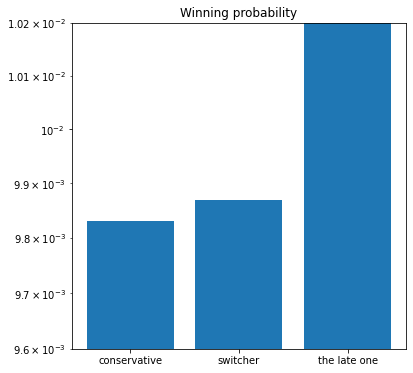

In [155]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

partecipants = ('conservative', 'switcher', 'the late one')
winning_prob = [prob_A, prob_B, prob_C]

x_pos = np.arange(len(partecipants))
ax.bar(x_pos,winning_prob)
ax.set_xticks(x_pos)
ax.set_xticklabels(partecipants)
ax.set_title("Winning probability")
ax.set_yscale('log')
ax.set_ylim(9.6e-3, 1.02e-2)